<a href="https://colab.research.google.com/github/majetikalyan007/ML-algorithms/blob/main/PCA_vs_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

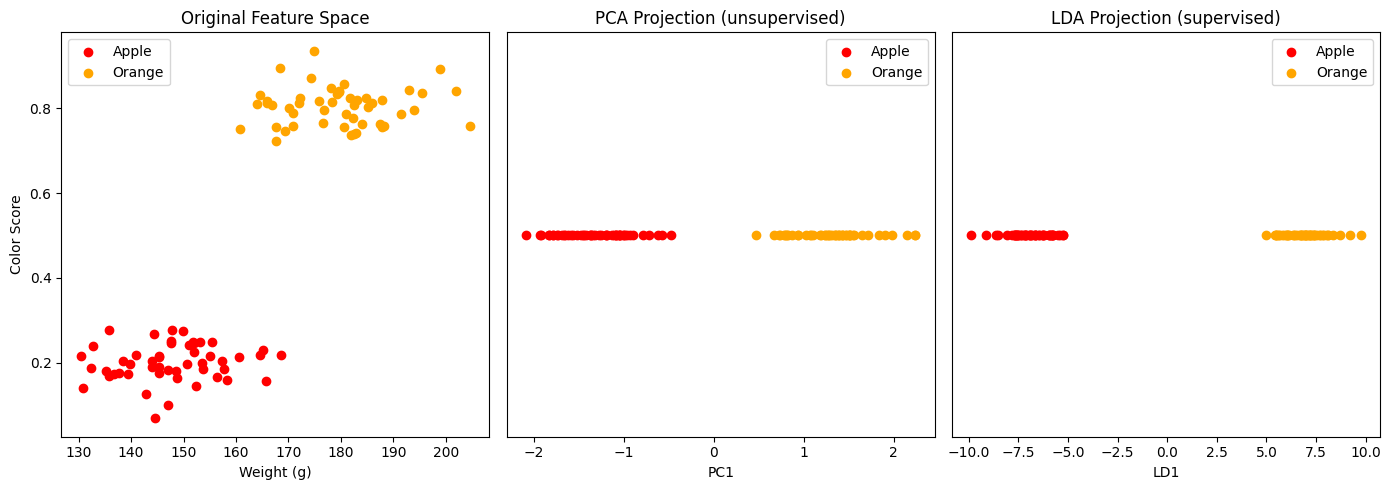

PCA explained variance ratio: [0.92615878]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1. Create synthetic Apple vs Orange dataset
# -------------------------------
np.random.seed(42)

# Apples: mean ~ (weight=150g, color=0.2)
apple_weight = np.random.normal(150, 10, 50)
apple_color = np.random.normal(0.2, 0.05, 50)

# Oranges: mean ~ (weight=180g, color=0.8)
orange_weight = np.random.normal(180, 10, 50)
orange_color = np.random.normal(0.8, 0.05, 50)

X = np.vstack([
    np.column_stack([apple_weight, apple_color]),
    np.column_stack([orange_weight, orange_color])
])
y = np.array([0]*50 + [1]*50)  # 0=apple, 1=orange

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 2. PCA (unsupervised)
# -------------------------------
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# -------------------------------
# 3. LDA (supervised)
# -------------------------------
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# -------------------------------
# 4. Plot results
# -------------------------------
plt.figure(figsize=(14,5))

# Original data
plt.subplot(1,3,1)
plt.scatter(X[y==0,0], X[y==0,1], c='red', label='Apple')
plt.scatter(X[y==1,0], X[y==1,1], c='orange', label='Orange')
plt.xlabel("Weight (g)")
plt.ylabel("Color Score")
plt.title("Original Feature Space")
plt.legend()

# PCA projection
plt.subplot(1,3,2)
plt.scatter(X_pca[y==0], np.zeros_like(X_pca[y==0]), c='red', label='Apple')
plt.scatter(X_pca[y==1], np.zeros_like(X_pca[y==1]), c='orange', label='Orange')
plt.title("PCA Projection (unsupervised)")
plt.xlabel("PC1")
plt.yticks([])
plt.legend()

# LDA projection
plt.subplot(1,3,3)
plt.scatter(X_lda[y==0], np.zeros_like(X_lda[y==0]), c='red', label='Apple')
plt.scatter(X_lda[y==1], np.zeros_like(X_lda[y==1]), c='orange', label='Orange')
plt.title("LDA Projection (supervised)")
plt.xlabel("LD1")
plt.yticks([])
plt.legend()

plt.tight_layout()
plt.show()

# Print explained variance for PCA
print("PCA explained variance ratio:", pca.explained_variance_ratio_)